In [1]:
import numpy as np
import pandas as pd

from functools import partial

from utils import validate_policy, eps_greedy, visualize_comparison

pd.options.mode.chained_assignment = None

# UCB1

Учитывая, что баннеры постоянно сменяются, я посчитал странным использовать в качестве счётчика времени кол-во вызовов функции. Вместо этого, за `t` я принимаю максимальное время жизни среди активных баннеров.

Для более чистой реализации функция `simulation` теперь также передаёт колонку `lifetime` при вызове функции `policy`.

In [2]:
class UCB:
    def __init__(self, C):
        self.C = C        

    def __call__(self, history: pd.DataFrame):
        t = max(history['lifetime'])

        exploitation = history['clicks'] / (history['impressions'] + 10)
        exploration = np.sqrt(2 * np.log(t) / (history['impressions'] + 10))

        value = exploitation + self.C * exploration        

        return history.index[np.argmax(value)]

# Exploration/ exploitation tuning

In [3]:
def compare_eps_greedy_and_ucb(n, eps, grid_ucb, seed):
    out_eps_greedy = validate_policy(
        policy=partial(eps_greedy, eps=eps),
        n=n,
        seed=seed,
        verbose=False
    )

    results = [dict(
        policy_name=f'eps_greedy (eps={eps})',
        data=out_eps_greedy['regrets_per_round']
    )]

    for C in grid_ucb:
        output = validate_policy(
            policy=UCB(C=C),
            n=n,
            seed=seed,
            verbose=False
        )

        results.append(dict(
            policy_name=f'UCB (C={C})',
            data=output['regrets_per_round']
        ))

    return results

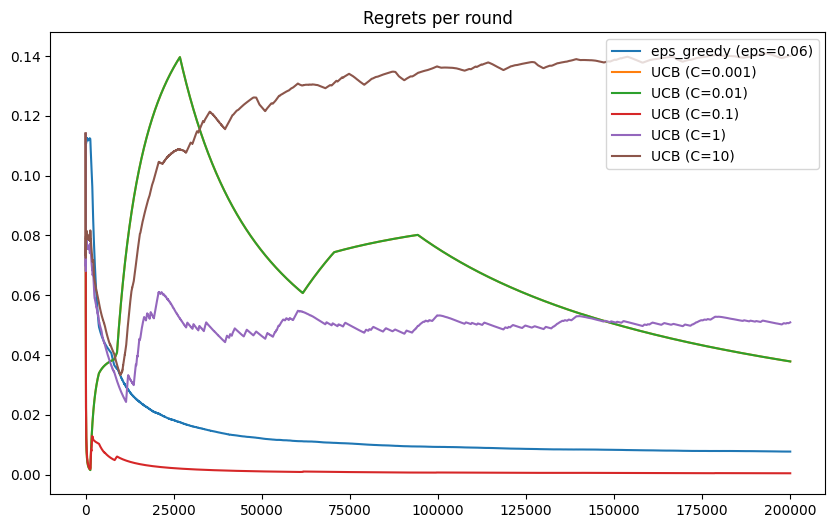

In [4]:
result = compare_eps_greedy_and_ucb(
    n=200_000,
    eps=0.06,
    grid_ucb=[0.001, 0.01, 0.1, 1, 10],
    seed=18475
)

visualize_comparison(result)

In [5]:
result = compare_eps_greedy_and_ucb(
    n=200_000,
    eps=0.06,
    grid_ucb=[0.06, 0.08, 0.1, 0.12, 0.14],
    seed=18475
)

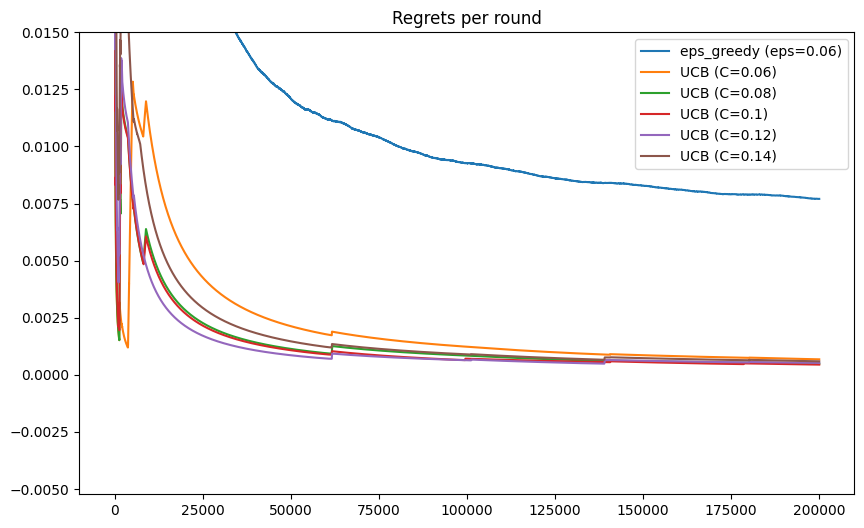

In [8]:
visualize_comparison(result, ylim=0.015)

# Perfomance

In [9]:
output = validate_policy(
    policy=UCB(C=0.1),
    n=200_000,    
    seed=18475    
)

print(f'\nRegret: {round(output["regret"], 2)}')
print(f'Total banners: {output["total_banners"]}')
print('\nHistory:')
print(output['history'])

Impressions simulated: 1      |   Regret per round: 0.114
Impressions simulated: 10001  |   Regret per round: 0.0054
Impressions simulated: 20001  |   Regret per round: 0.0027
Impressions simulated: 30001  |   Regret per round: 0.0018
Impressions simulated: 40001  |   Regret per round: 0.0013
Impressions simulated: 50001  |   Regret per round: 0.0011
Impressions simulated: 60001  |   Regret per round: 0.0009
Impressions simulated: 70001  |   Regret per round: 0.0009
Impressions simulated: 80001  |   Regret per round: 0.0008
Impressions simulated: 90001  |   Regret per round: 0.0007
Impressions simulated: 100001 |   Regret per round: 0.0007
Impressions simulated: 110001 |   Regret per round: 0.0007
Impressions simulated: 120001 |   Regret per round: 0.0006
Impressions simulated: 130001 |   Regret per round: 0.0006
Impressions simulated: 140001 |   Regret per round: 0.0006
Impressions simulated: 150001 |   Regret per round: 0.0006
Impressions simulated: 160001 |   Regret per round: 0.000

# 